In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 200)

df = pd.read_csv('./2020.csv')
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [17]:
df.shape

(153, 20)

In [18]:
# Check null values
null_vals = df.columns[df.isnull().any()]
null_vals

Index([], dtype='object')

In [22]:
# Filter dataframe so that it has only the columns we are interested in and rename those columns
new_df = df[['Country name','Regional indicator','Ladder score','Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Dystopia + residual']]
new_df.set_axis(['Country', 'Region', 'Score', 'GDP', 'Social', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Unexplained'], axis='columns', inplace=True)

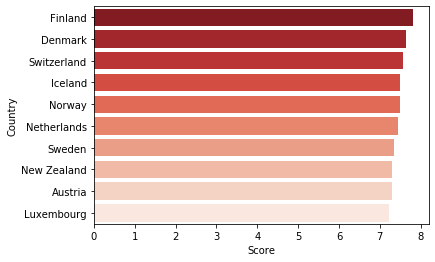

In [70]:
# Top 10 countries
sns.barplot(y='Country', x='Score', data=new_df[:10], palette='Reds_r')

In [71]:
# Group happiness score by region
score_by_region = new_df.groupby('Region')['Score'].mean().reset_index().sort_values('Score', ascending=False)
score_by_region

,Region,Score
5,North America and ANZ,7.173525
9,Western Europe,6.899219
3,Latin America and Caribbean,5.981786
0,Central and Eastern Europe,5.883818
2,East Asia,5.714850
7,Southeast Asia,5.383367
1,Commonwealth of Independent States,5.358342
4,Middle East and North Africa,5.227159
6,South Asia,4.475443
8,Sub-Saharan Africa,4.383495


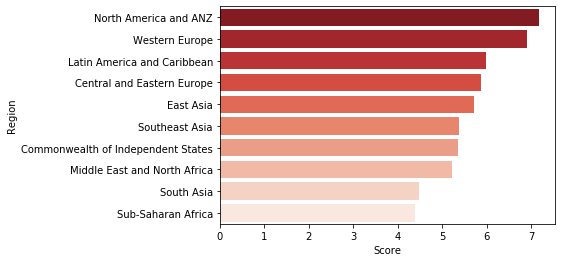

In [73]:
# Visualize happiness score by region
sns.barplot(y='Region', x='Score', data=score_by_region, palette='Reds_r')

In [78]:
# use the original dataframe to Group healthy life expectancy by region
health_by_region = df.groupby('Regional indicator')['Healthy life expectancy'].mean().round(2).reset_index().sort_values('Healthy life expectancy', ascending=False)
health_by_region

,Regional indicator,Healthy life expectancy
9,Western Europe,72.86
5,North America and ANZ,72.18
2,East Asia,71.09
0,Central and Eastern Europe,68.15
3,Latin America and Caribbean,66.72
4,Middle East and North Africa,65.31
1,Commonwealth of Independent States,64.73
7,Southeast Asia,64.71
6,South Asia,62.45
8,Sub-Saharan Africa,55.09


In [100]:
health_by_region.describe().round(2)

,Healthy life expectancy
count,10.00
mean,66.33
std,5.28
min,55.09
25%,64.72
50%,66.02
75%,70.36
max,72.86


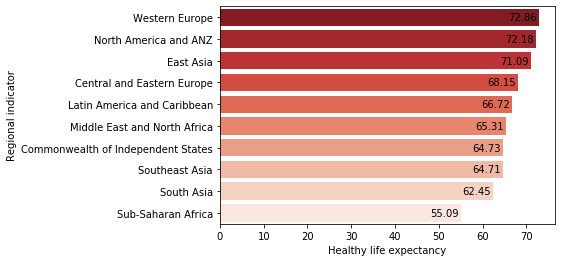

In [101]:
# Visualize happiness score by region
bar_plot = sns.barplot(y='Regional indicator', x='Healthy life expectancy', data=health_by_region, palette='Reds_r')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), '.2f'), (p.get_width() - 6, p.get_y() + p.get_height() / 2., ), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')


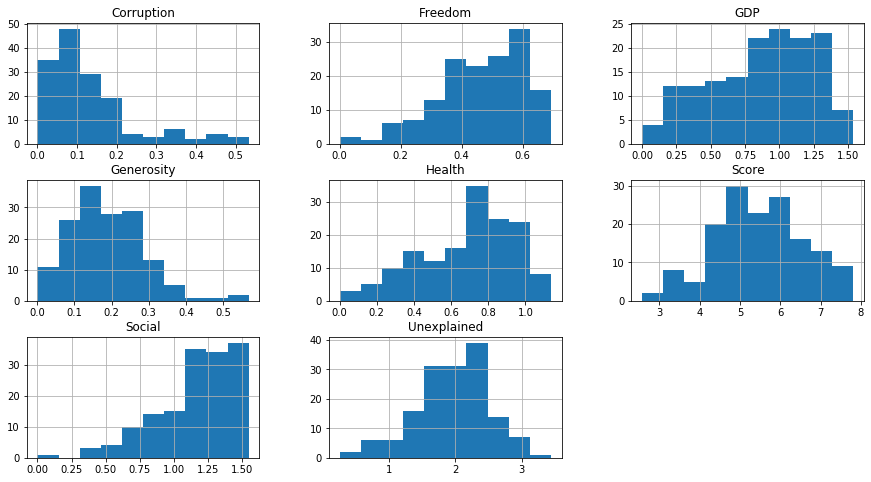

In [102]:
# Exploring the different variables
fig = new_df.hist(figsize=(15,8));


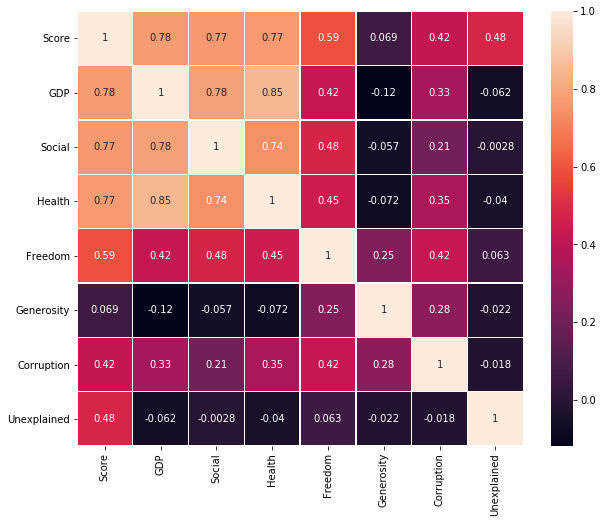

In [103]:
# find correlation between the variables
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(new_df.corr(), annot=True, ax=ax, linewidths=0.5,  annot_kws={"fontsize":10});